In [2]:
from bunkatech.time.time import SemanticsTrend
import bamboolib
import pandas as pd
import numpy as np

'''
data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data.sample(100)
'''

df_sample = pd.read_csv(
        "/Volumes/OutFriend/timeline_folding/time_sample.csv", index_col=[0]
    )
platform = "facebook"
df_sample= df_sample[df_sample["origin"] == platform]
#df_sample['date'] = pd.to_datetime(df_sample['date'])
#df_sample = df_sample[df_sample['date'].dt.year >= 2019]
df_sample = df_sample.rename(columns = {'text':'fb_text'})

In [3]:
#df_sample['date'].values.astype(np.int64) // 10** 9

In [4]:
trend = SemanticsTrend(data = df_sample, text_var = 'fb_text', index_var = 'id', date_var = 'date')

In [5]:
trend.fit(extract_terms = True,
            docs_embedding = False, 
            terms_embedding = False, 
            sample_size_terms = 3000, 
            terms_limit = 3000,
            terms_ents = False,
            terms_ngrams = (1,2),
            terms_ncs = True,
            language = 'fr')

Extract Terms: 100%|█████████████████████████████████████████████| 3000/3000 [01:08<00:00, 43.49it/s]


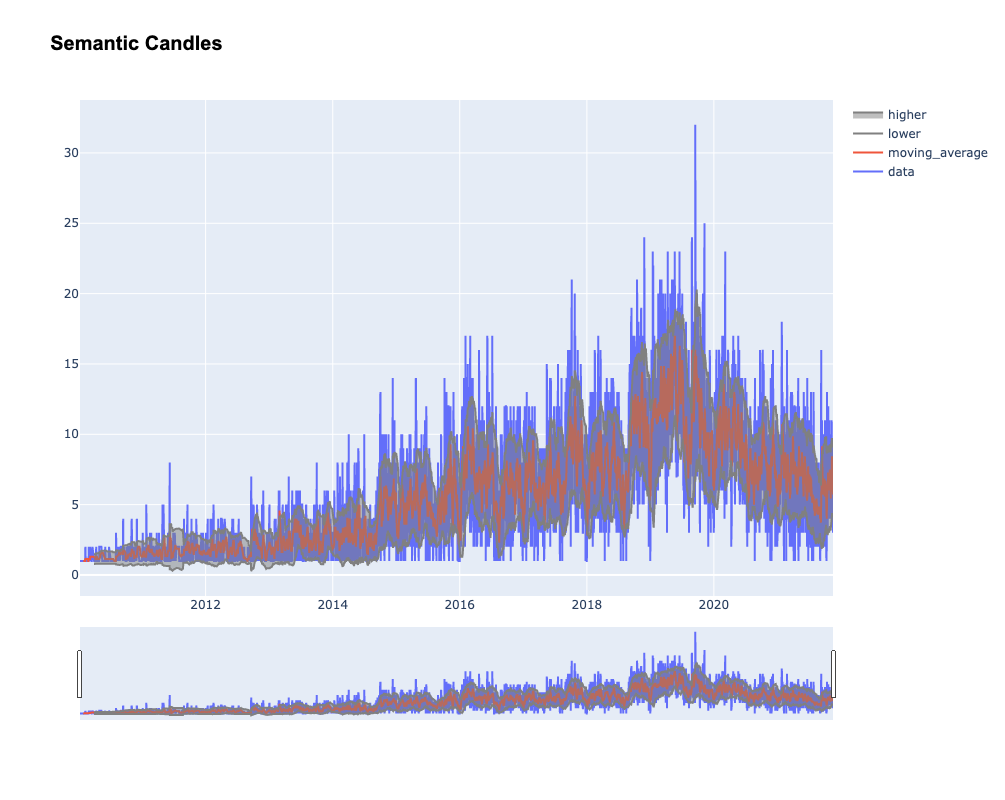

In [6]:

fig = trend.classic_trend(smoothing_scale=7, # 7 days
                    context_scale=30, # 30 days
                    height=800,
                    width=800,
                    stv_scale=1)
fig.show()


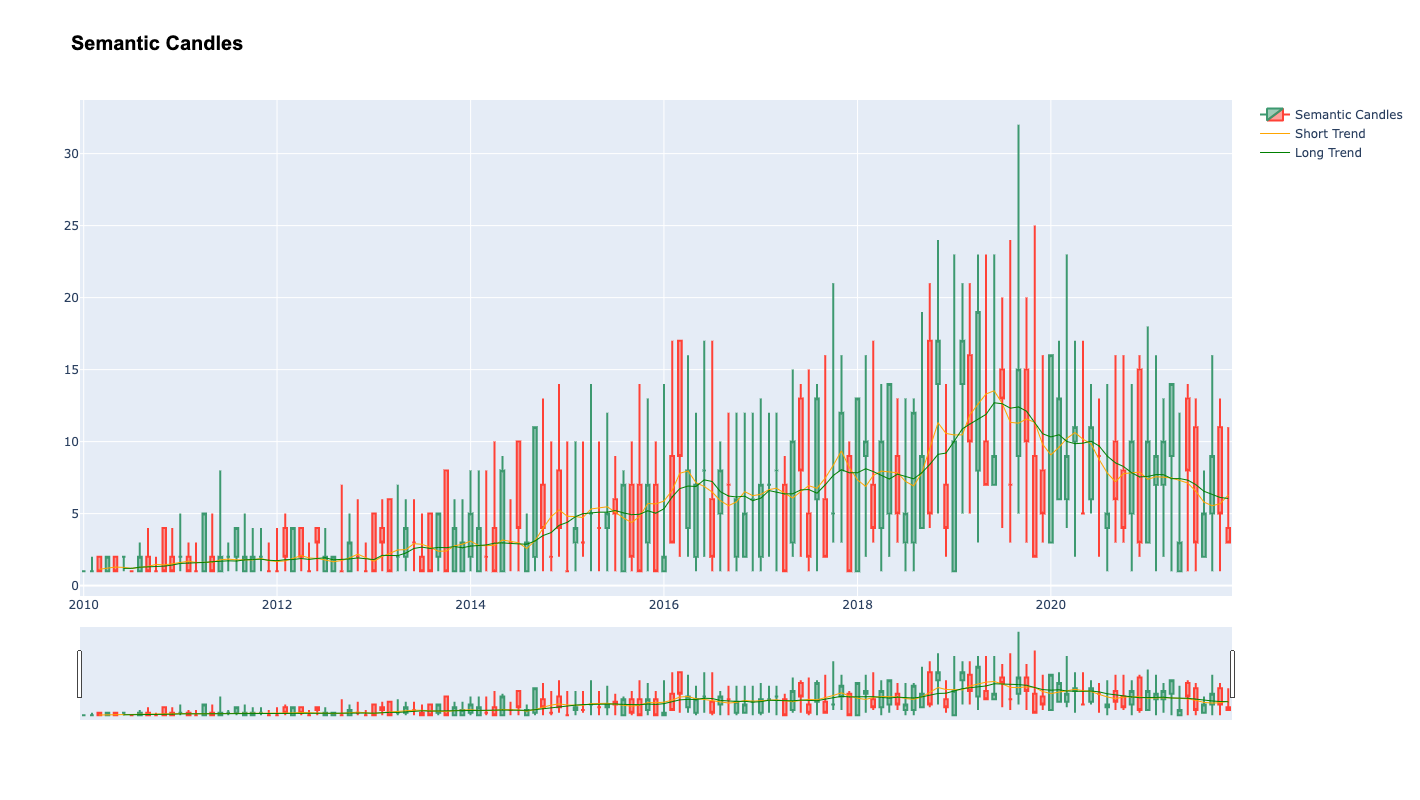

In [7]:

fig = trend.semantic_candles(short_trend_step=3,  # 3 months 
                            long_trend_step=6, # 6 months
                            height=800,
                            width=800)
                            
fig.show()

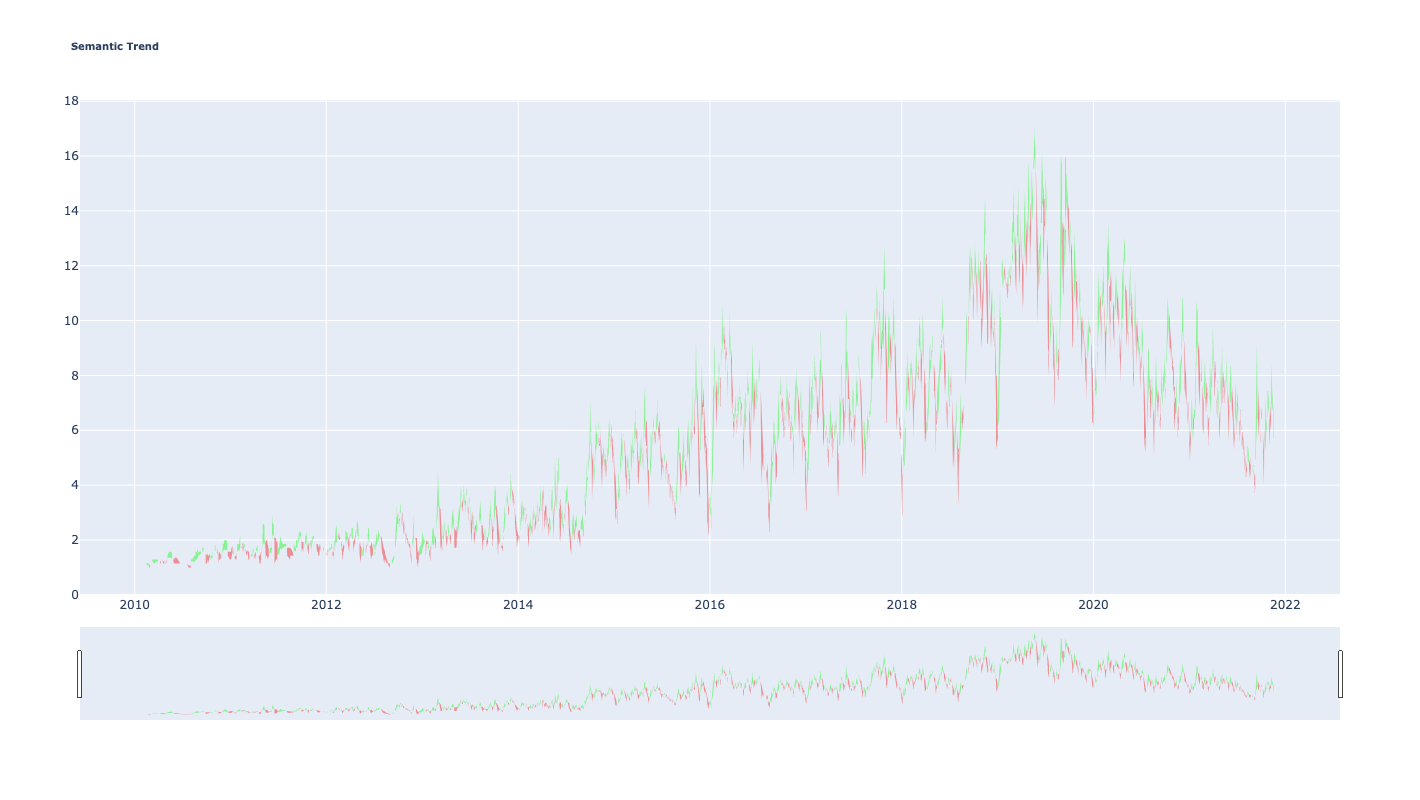

In [8]:
fig = trend.moving_average_comparison(
        smoothing_scale=7,
        context_scale=14,
        height=800,
        width=1500,
        top_terms_period = 25)


fig.show()


In [ ]:
import plotly
plotly.offline.plot(fig, filename = '/Users/charlesdedampierre/Desktop/anses.html', auto_open=False)

In [25]:
res = trend.specific_terms_time()